In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Trial I

In [126]:
def d(t, g, M_c, M_a, M_h, M_m):
    return 0.1 + 0.5*M_h*g/(M_c + M_a + M_m )*t**2

In [127]:
g = 9.81      # m/s^2

M_c1 = 0.475   # kg

M_a1 = 0     # kg For trial one additional mass is zero  

M_m1  = 0    # kg for trial one mystry mass is zero

M_h1 = 50.0/1000  # Force1 = 50.0*9.81/1000  Newton   


In [128]:
t1 = np.arange(0, 20.5, 0.5)

In [129]:
np.shape(t1)

(41,)

In [130]:
random_error = np.random.rand()
random_error

0.9057664493157657

In [131]:
def dis_noise(distance, prm):
    d1 = []
    i = 0
    for data in distance:
        d_e = data + prm*data*np.random.rand()
        d1.append(d_e)
        i += 1
    return d1

[0.10444990045351725, 0.24720699251965195, 0.6872006895696415, 1.336734978769117]


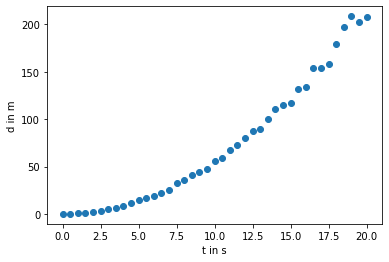

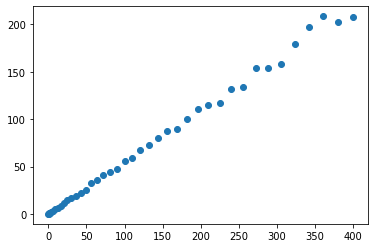

In [132]:

g = 9.81      # m/s^2

M_c1 = 0.475   # kg

M_a1 = 0     # kg For trial one additional mass is zero  

M_m1  = 0    # kg for trial one mystry mass is zero

M_h1 = 50.0/1000  # kg  # Force1 = 50.0*9.81/1000  Newton    


distance = d(t1, g, M_c1, M_a1, M_h1, M_m1)
distance[0:5]

d1 = dis_noise(distance, 0.12)
print(d1[0:4])

plt.scatter(t1, d1)
plt.xlabel('t in s')
plt.ylabel('d in m')
plt.show()


t2 = t1**2

plt.scatter(t2, d1)
plt.show()

## Trial2

[0.10723454830093224, 0.24847259471109212, 0.6141038902424859, 1.2690880736097367]


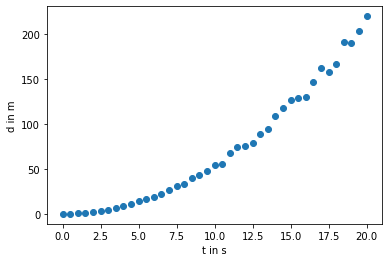

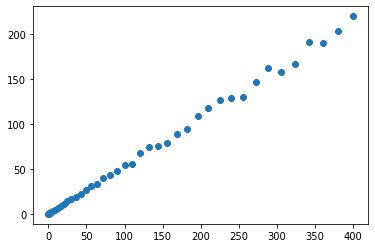

In [133]:
M_c2 = 0.475   # kg

M_a2 = 0.5     # kg For trial one additional mass is zero  

M_m2  = 0    # kg for trial one mystry mass is zero

M_h2 = 100.0/1000  # kg    # Force2 = 100.0*9.81/1000  Newton     


distance2 = d(t1, g, M_c2, M_a2, M_h2, M_m2)
distance2[0:5]

d2 = dis_noise(distance2, 0.12)
print(d2[0:4])

plt.scatter(t1, d2)
plt.xlabel('t in s')
plt.ylabel('d in m')
plt.show()


t2 = t1**2

plt.scatter(t2, d2)
plt.show()

## Trial 3

[0.11181292508914085, 0.25413548204859565, 0.744942476394159, 1.4227571951148947]


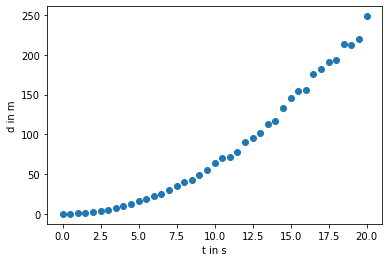

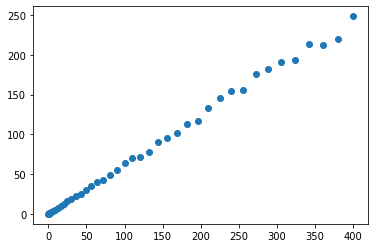

In [134]:
M_c3 = 0.475   # kg

M_a3 = 0.5     # kg For trial one additional mass is zero  

M_m3  = 0.3    # kg for trial one mystry mass is zero

M_h3 = 150.0/1000  # kg # Force3 = 150.0*9.81/1000  Newton     


distance3 = d(t1, g, M_c3, M_a3, M_h3, M_m3)
distance3[0:5]

d3 = dis_noise(distance3, 0.12)
print(d3[0:4])


plt.scatter(t1, d3)
plt.xlabel('t in s')
plt.ylabel('d in m')
plt.show()

t2 = t1**2

plt.scatter(t2, d3)
plt.show()

In [145]:
len(t2)

41

### Force vs Acceleration

In [149]:
force = np.arange(50,870,20)
force, len(force)

(array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290,
        310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550,
        570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810,
        830, 850]), 41)

In [150]:
def a(g, M_c4, M_a4, M_h4, M_m4):
    return (M_h4*g)/(M_c4 + M_a4 + M_m4)   

In [151]:
g = 9.81
M_c4 = 0.475
M_a4 = 0.5
M_m4 = 0.3 

M_h4 = 50.0/1000.0

In [152]:
a(g, M_c4, M_a4, M_h4, M_m4)

0.38470588235294123

In [153]:
acce = []

for wgt in force:
    acce.append(a(g, M_c4, M_a4, wgt/1000.0, M_m4) + 0.08*a(g, M_c4, M_a4, wgt/1000.0, M_m4)*np.random.rand())

In [154]:
acce[0:5]

[0.39336916581265075,
 0.5583903351130801,
 0.7285012487204264,
 0.8768356302643017,
 1.0444418170807792]

In [155]:
force1 = force*9.81/1000.0 

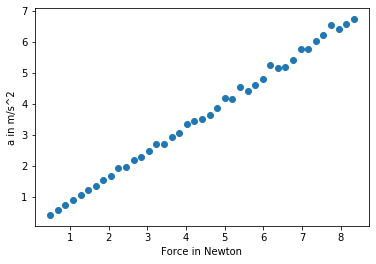

In [156]:
plt.scatter(force1, acce)
plt.xlabel('Force in Newton')
plt.ylabel('a in m/s^2')
plt.show()

In [157]:
d_t = pd.DataFrame( {"time-s":t1,"dis-trial1":d1,"dis-trial2":d2,"dis-trial3":d3,"Force-N":force1,"a-m-per-s^2":acce } ) 

In [158]:
d_t.head()

,time-s,dis-trial1,dis-trial2,dis-trial3,Force-N,a-m-per-s^2
0,0.0,0.104450,0.107235,0.111813,0.4905,0.393369
1,0.5,0.247207,0.248473,0.254135,0.6867,0.558390
2,1.0,0.687201,0.614104,0.744942,0.8829,0.728501
3,1.5,1.336735,1.269088,1.422757,1.0791,0.876836
4,2.0,2.302681,2.323644,2.531570,1.2753,1.044442


In [159]:
d_t.to_csv("data-expt4.csv", header=True, index=False)

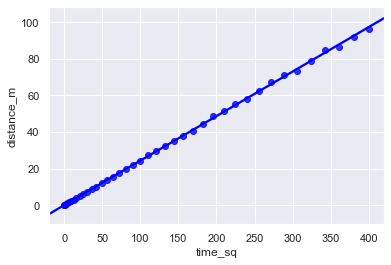

In [29]:
import seaborn as sns; sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
ax = sns.regplot(x="time_sq", y="distance_m", data=d_tsq, order=1, color='blue')

In [155]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [156]:
reg_fit = ols('distance_m ~ time_sq', d_tsq).fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             distance_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.778e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           5.68e-73
Time:                        18:46:59   Log-Likelihood:                -24.972
No. Observations:                  41   AIC:                             53.94
Df Residuals:                      39   BIC:                             57.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.106      0.017      0.9

In [165]:
reg_fit._coef

AttributeError: 'OLSResults' object has no attribute '_coef'

In [142]:
type(reg_fit.summary)

method

In [157]:

m = 0.2455

b = 0.0018


In [160]:
a_fit = 2*m
a_fit

0.491

In [161]:
d1 = m*d_tsq['time_sq'] + b
d_tsq['d_best_fit'] = d1
d_tsq.head()

,time_s,time_sq,distance_m,d_best_fit
0,0.0,0.00,0.102890,0.001800
1,0.5,0.25,0.162232,0.063175
2,1.0,1.00,0.342269,0.247300
3,1.5,2.25,0.642902,0.554175
4,2.0,4.00,1.062601,0.983800


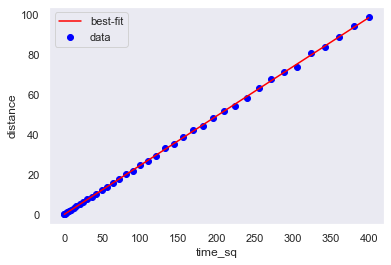

In [163]:
plt.scatter(d_tsq.time_sq, d_tsq.distance_m, color='blue', marker='o', label='data')
plt.plot(d_tsq.time_sq, d_tsq.d_best_fit, color='red', label='best-fit')
plt.xlabel('time_sq')
plt.ylabel('distance')
plt.legend()
plt.grid()
plt.show()